# Libraries

All the functions are implement in ```functions.py``` file.

In [2]:
from functions import *
import pandas as pd

# Download original dataset

The images are available on a Google Drive link.

In [2]:
# download_and_extract_gdrive_zip("1bRG21aGbC4XdxqVw5fLAnI2WYJyRNNXp")

# Get contours

In [2]:
process_images_to_json('dataset/binary-masks', 'dataset_contours_aggregate')

Contours by file extracted and saved to dataset/dataset_contours_aggregate_by_image.json


(532, 7039)

### Test contour and circle from dataset

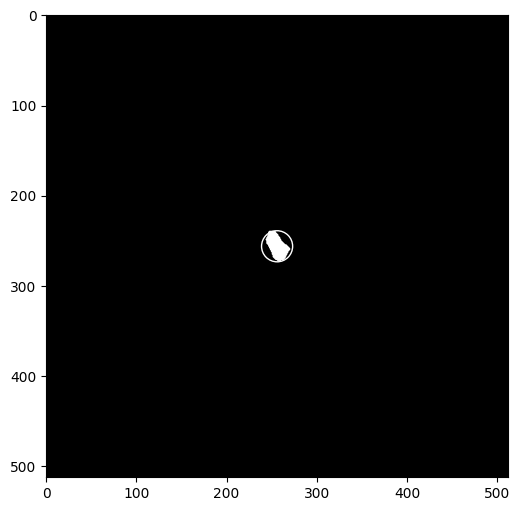

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load
with open('dataset/dataset_contours_aggregate_by_image.json', 'r') as f:
    data = json.load(f)

# Patch
pa = '16_114.png'

# Black background
fig, ax = plt.subplots(figsize=(6,6))
ax.set_facecolor("black")

# Fill the contour with white
ax.fill(data[pa]['x coordinate in patch'], data[pa]['y coordinate in patch'], facecolor="white", edgecolor="white")

# White circle
circle = plt.Circle((256, 256), data[pa]['diameter (px)']/2, color="white", fill=False)
ax.add_patch(circle)

# Plot adjustments
ax.set_xlim(0, 512)
ax.set_ylim(0, 512)
ax.invert_yaxis()       # optional: invert y-axis to match image coordinates
ax.set_aspect('equal')

# Show the plot
plt.show()

# Clean "strange" contours

What are "strange contours"?

- non-convex
- multiple contours

### Multiple contours

In [6]:
_ = find_multipolygon_contours('dataset/dataset_contours_aggregate_by_image.json')

[MultiPolygon] 01_66.png
[MultiPolygon] 03_7.png
[MultiPolygon] 03_44.png
[MultiPolygon] 03_63.png
[MultiPolygon] 03_71.png
[MultiPolygon] 03_507.png
[MultiPolygon] 07_329.png
[MultiPolygon] 08_35.png
[MultiPolygon] 08_63.png
[MultiPolygon] 08_255.png
[MultiPolygon] 09_22.png
[MultiPolygon] 10_129.png
[MultiPolygon] 13_41.png
[MultiPolygon] 13_135.png
[MultiPolygon] 14_107.png
[MultiPolygon] 15_13.png
[MultiPolygon] 15_444.png
[MultiPolygon] 16_158.png
[MultiPolygon] 16_183.png
[MultiPolygon] 17_269.png


### Non-convex

In [ ]:
# Luiz colocar aqui o purge
purge_2_list = ["01_36.png", "01_83.png", "01_95.png", "01_108.png", "01_129.png", "01_142.png", "01_170.png",
                "01_179.png", "01_224.png", "01_264.png", "01_282.png", "01_301.png", "01_314.png", "01_353.png",
                "02_62.png", "02_215.png", "02_243.png", "03_35.png", "03_250.png", "03_251.png", "03_258.png",
                "03_298.png", "03_252.png", "03_378.png", "03_455.png", "04_22.png", "04_49.png", "04_72.png",
                "04_78.png", "04_91.png", "04_92.png", "04_204.png", "04_205.png", "04_239.png", "04_309.png",
                "05_07.png", "05_30.png", "05_46.png", "05_76.png", "05_107.png", "05_133.png", "05_140.png",
                "05_147.png", "05_153.png", "05_172.png", "05_185.png", "05_192.png", "05_328.png", "05_401.png", 
                "16_113.png"]

purge_2_list_convex_hull = ["01_16.png", "01_18.png", "01_85.png", "01_121.png", "01_136.png", "01_154.png",
                            "01_200.png", "01_205.png", "01_243.png", "01_312.png", "01_332.png", "01_356.png",
                            "02_52.png", "02_87.png", "02_113.png", "02_130.png", "02_131.png", "02_139.png",
                            "02_140.png", "02_168.png", "02_174.png", "02_203.png", "02_217.png", "02_235.png",
                            "02_247.png", "02_248.png", "02_255.png", "02_271.png", "02_301.png", "02_303.png",
                            "03_31.png", "03_58.png", "03_102.png", "03_134.png", "03_143.png", "03_151.png",
                            "03_158.png", "03_225.png", "03_234.png", "03_288.png", "03_293.png", "03_306.png",
                            "03_310.png", "03_313.png", "03_320.png", "03_321.png", "03_357.png", "03_372.png",
                            "03_383.png", "03_384.png", "03_404.png", "03_452.png", "03_527.png", "03_562.png",
                            "03_572.png", "04_10.png", "04_13.png", "04_14.png", "04_26.png", "04_27.png", 
                            "04_28.png", "04_32.png", "04_34.png", "04_36.png", "04_37.png", "04_48.png",
                            "04_50.png", "04_56.png", "04_61.png", "04_62.png", "04_82.png", "04_85.png",
                            "04_90.png", "04_94.png", "04_92.png", "04_106.png", "04_109.png", "04_114.png",
                            "04_117.png","04_119.png","04_126.png", "04_130.png", "04_136.png", "04_141.png",
                            "04_184.png", "04_200.png", "04_220.png", "04_226.png", "04_235.png", "04_245.png",
                            "04_264.png", "04_268.png", "04_271.png", "04_280.png", "04_284.png", "04_288.png",
                            "04_291.png", "04_298.png", "04_299.png", "04_301.png", "04_304.png", "04_308.png",
                            "04_321.png", "04_326.png", "04_336.png", "04_337.png", "04_342.png", "04_352.png",
                            "05_29.png", "05_36.png", "05_63.png", "05_65.png", "05_75.png", "05_116.png",
                            "05_117.png", "05_154.png", "05_174.png", "05_197.png", "05_210.png", "05_219.png",
                            "05_223.png", "05_224.png", "05_241.png", "05_245.png", "05_269.png", "05_282.png",
                            "05_285.png", "05_297.png", "05_317.png", "05_327.png", "05_338.png", "05_366.png",
                            "05_370.png", "05_386.png", "05_391.png", "05_3961.png", "05_444.png", "05_453.png"]
purge_list = purge_1_list + purge_2_list

### Delete

In [6]:
purge_images_everywhere(purge_list, 'dataset/binary-patchs', 'dataset_contours_aggregate.csv', '.json')

TypeError: purge_images_everywhere() missing 1 required positional argument: 'csv_image_col'

# Plot one sample of the dataset

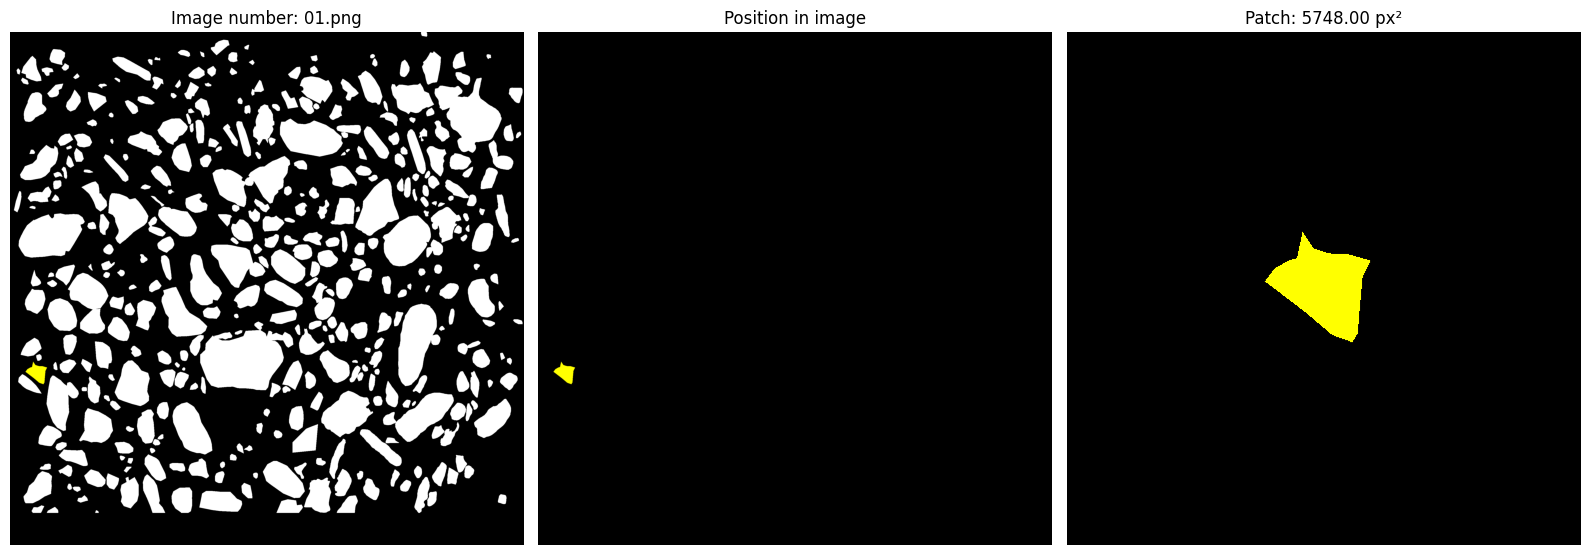

In [ ]:
# plot_contours_from_json("dataset_contours_aggregate_by_image.json", keys_to_plot=["01.png"]) 

# Filter contours

In [11]:
filter_images_by_diameter('dataset/dataset_contours_aggregate_by_image.csv', 'dataset/dataset_contours_aggregate_by_image.json', 'dataset_contours_aggregate_by_image_filtered', (10.0, 15.0))

# Create contours in a patch

In [ ]:
create_patches_image('dataset/dataset_contours_aggregate_by_image.json', 'dataset/binary-patchs_new')

# Statistics

In [12]:
df = pd.read_csv('dataset/dataset_contours_aggregate_by_image_filtered.csv')
df.head()

,image name,contour area (px),contour area (mm2),diameter (px),diameter (mm)
0,01_83.png,37645.0,33.88050,362.008514,10.860255
1,01_142.png,96149.0,86.53410,465.725861,13.971776
2,01_154.png,51848.5,46.66365,408.925629,12.267769
3,01_229.png,50787.0,45.70830,342.597656,10.277930
4,01_282.png,45803.5,41.22315,383.128876,11.493866


In [13]:
df.describe()

,contour area (px),contour area (mm2),diameter (px),diameter (mm)
count,52.000000,52.000000,52.000000,52.000000
mean,45491.182692,40.942064,381.492379,11.444771
std,16315.807227,14.684227,39.705432,1.191163
min,17620.500000,15.858450,335.680115,10.070403
25%,35546.500000,31.991850,347.486176,10.424585
50%,40736.000000,36.662400,372.700897,11.181027
75%,51908.500000,46.717650,402.127495,12.063825
max,96149.000000,86.534100,486.319031,14.589571


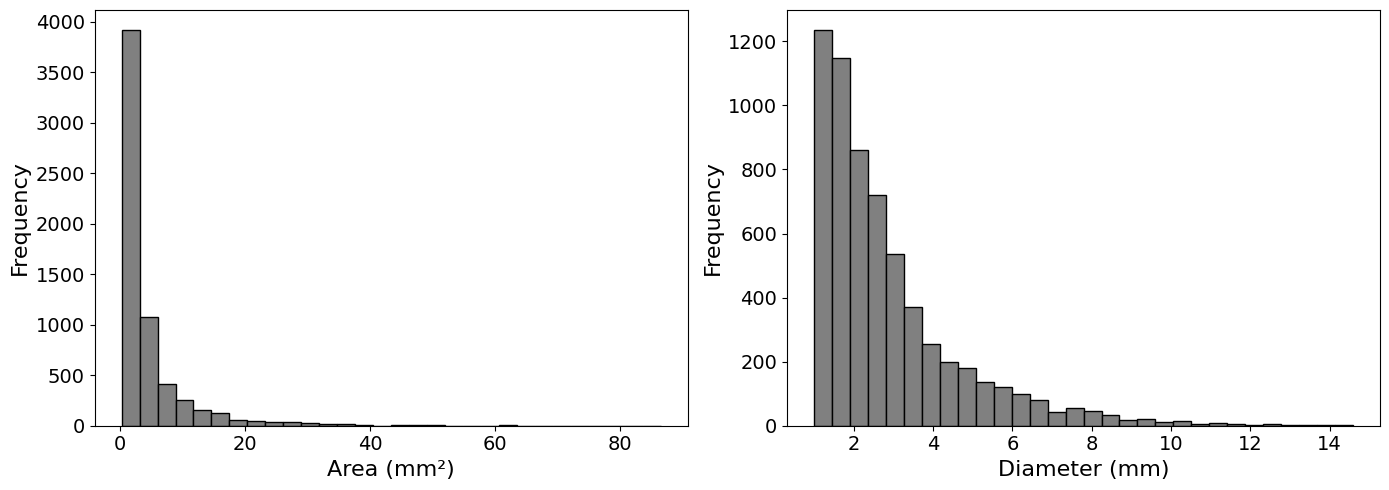

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['contour area (mm2)'], bins=30, color='gray', edgecolor='black')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].hist(df['diameter (mm)'], bins=30, color='gray', edgecolor='black')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('frequency_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

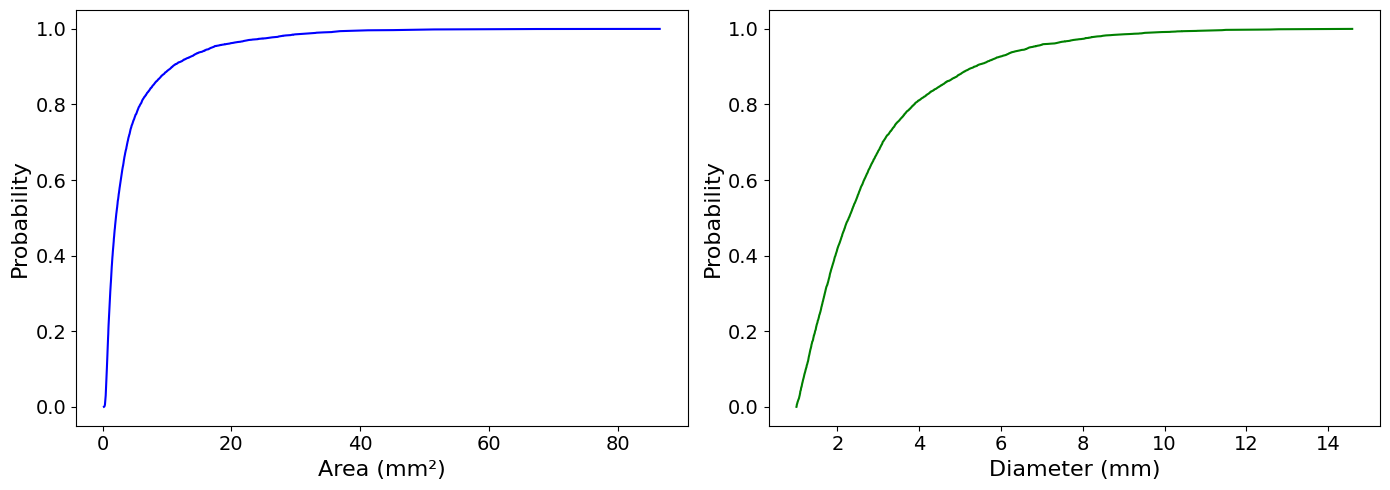

In [10]:
area_sorted, area_cdf = obtain_cdf(list(df['contour area (mm2)']))
diameter_sorted, diameter_cdf = obtain_cdf(list(df['diameter (mm)']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(area_sorted, area_cdf, color='blue')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Probability", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].plot(diameter_sorted, diameter_cdf, color='green')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Probability", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('Probability_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
def sort_contours_using_uniform_pdf_and_group(csv_path: str, json_path: str, n_objects: int, n_groups: int = 20):
    """
    Sort contours using a uniform probability density function and group them. 

    :param csv_path: Path to the CSV file with contour data
    :param json_path: Path to the JSON file with contour data
    :param n_objects: Number of objects to sample
    :param n_groups: Number of groups to create

    :return: Sorted and grouped contours
    """

    with open(json_path, 'r') as f:
        contour_data = json.load(f)
    df_json = pd.DataFrame.from_dict(contour_data, orient='index')
    df_json['image_name'] = df_json.index
    df_json = df_json.reset_index(drop=True)
    df_csv = pd.read_csv(csv_path)
    df_full = pd.merge(df_json, df_csv, on='image_name')
    df_full = df_full[['image_name', 'x coordinate in 0,0', 'y coordinate in 0,0', 'diameter (px)', 'diameter (mm)', 'area (px)', 'area (mm2)']]

    df_sorted = df_full.sort_values('diameter (px)', ascending=False).reset_index(drop=True)
    group_dim = np.array_split(df_sorted.index, n_groups)
    df_sorted['group by diameter (px)'] = -1
    for i, group in enumerate(group_dim):
        df_sorted.loc[group, 'group by diameter (px)'] = i + 1

    return df_sorted